In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Import parametric statistics
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal, wilcoxon
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [2]:
data = pd.read_csv('ESSdata_Thinkful.csv')

In [3]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
# Reminders: 6 = 2012, 7 = 2014 (year)

# 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [5]:
data['cntry'].value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

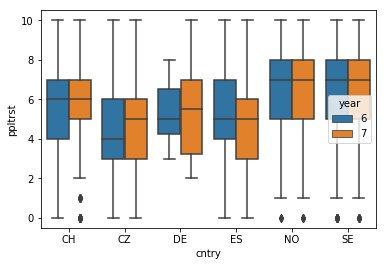

In [6]:
sns.boxplot(x='cntry', y='ppltrst', hue='year', data=data)

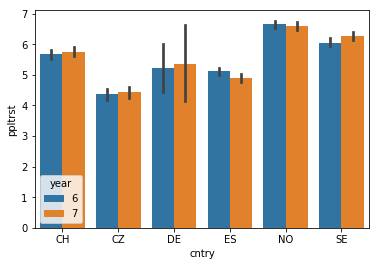

In [7]:
sns.barplot(x='cntry', y='ppltrst', hue='year', data=data)

It's not easy to see from these graphs, so we'll make histograms of each country to see if the data is normally distribued. We'll also use the Shapiro test to determine if the distribution is normal

					Distribution of Trust


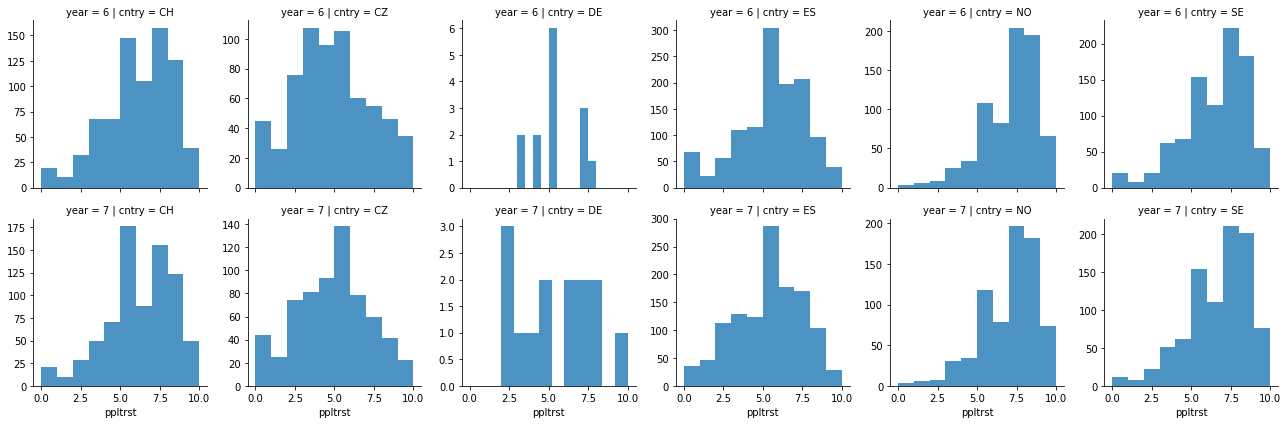

Shapiro Tests for Normality
CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715775847434998, 1.8777941424019673e-09)

DE 6 (0.8929166197776794, 0.10693283379077911)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292040467262268, 7.928973676032161e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



In [47]:
# Plotting histograms of trust for each country for each year
g = sns.FacetGrid(data, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
print('\t\t\t\t\tDistribution of Trust')
plt.show()

# Testing each country and each year to determine if trust is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(data.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = data[data.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(data_temp[data_temp.year ==year].ppltrst))
    print()

We cannot reject our null hypothesis, and therefore we find that the data is not normally distributed. 

In [9]:
# Wilcoxon Signed Rank Test for each country between years.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = data[data.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(data_temp[data_temp.year == 6].ppltrst, 
                        y=data_temp[data_temp.year == 7].ppltrst))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

NO WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)



/usr/local/lib/python3.7/site-packages/scipy/stats/morestats.py:2781: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/usr/local/lib/python3.7/site-packages/scipy/stats/morestats.py:2782: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


**Answer:** Spain and Sweden show a difference in trust from 2012 to 2014, however only Spain shows that they are less trusting. 

# 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

					Distribution of Happiness


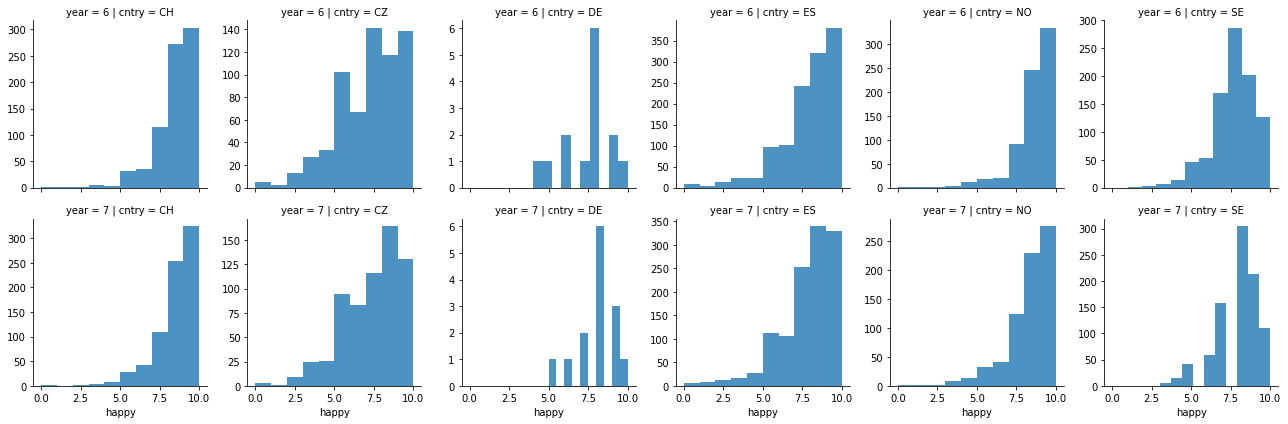

Shapiro Tests for Normality
CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)

CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.9448645710945129, 3.1643033327052525e-14)

DE 6 (0.9160983562469482, 0.22210942208766937)
DE 7 (0.9213663339614868, 0.23006466031074524)

ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898763644671094e-25)

NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795287609100342, 4.6808705797415216e-23)

SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.912103533744812, 5.600742285549146e-22)



In [46]:
# Plotting histograms of trust for each country for each year
g = sns.FacetGrid(data, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8)
print('\t\t\t\t\tDistribution of Happiness')
plt.show()

# Testing each country and each year to determine if trust is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(data.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = data[data.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(data_temp[data_temp.year ==year].happy))
    print()

Again, the results of the Shapiro test and looking at the histrograms tell us that this information is not normally distributed. 

In [11]:
# Wilcoxon Signed Rank Test for each country between years.

print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = data[data.cntry ==cnt]
    
    # Printing Shapiro test results
    print(cnt, wilcoxon(data_temp[data_temp.year == 6].happy,
                       y=data_temp[data_temp.year == 7].happy))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)



Looks like the difference is statistically significant in the Czech Republic as well as in Spain. But how?

In [12]:
es_cz = data[data['cntry'].isin(['CZ', 'ES'])]

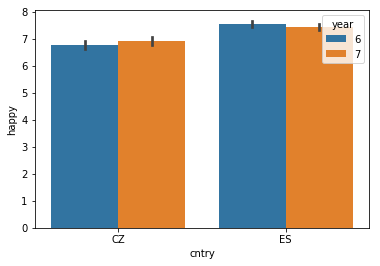

In [13]:
sns.barplot(x='cntry', y='happy', hue='year', data=es_cz)

**Answer:** While it looked like happiness changed significantly in the Czech Republic and Spain from 2012 to 2014, it looks like it only increased in the Czech Republic.

# 3. Who reported watching more TV in 2012, men or women?

In [14]:
tv_time = data[data['year'] == 6]

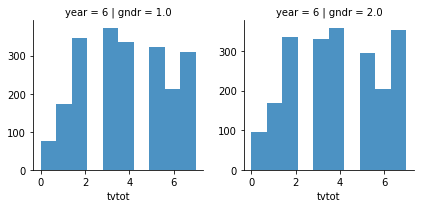

In [15]:
g = sns.FacetGrid(tv_time, row='year', col='gndr', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'tvtot', alpha=0.8)

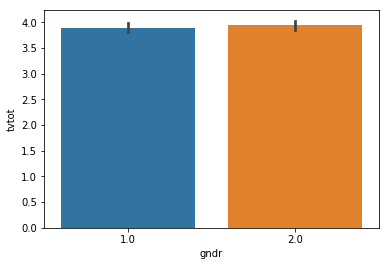

In [16]:
sns.barplot(x='gndr', y='tvtot', data=tv_time)

In [17]:
tv_time['gndr'].value_counts()

1.0    2154
2.0    2143
Name: gndr, dtype: int64

In [18]:
tv_stats = tv_time.groupby('gndr').describe()

tv_stats['tvtot']

,count,mean,std,min,25%,50%,75%,max
gndr,,,,,,,,
1.0,2151.0,3.901906,1.983690,0.0,2.0,4.0,5.0,7.0
2.0,2140.0,3.944393,2.049457,0.0,2.0,4.0,6.0,7.0


In [19]:
# Printing Wilcoxon Test for TV watching across genders
print('Wilcoxon Test:', wilcoxon(tv_time[tv_time.gndr == 1].tvtot.dropna()[:2140], 
                                 y=tv_time[tv_time.gndr == 2].tvtot.dropna()))


Wilcoxon Test: WilcoxonResult(statistic=782530.0, pvalue=0.5033507782372963)


**Answer:** The amount of time spend watching TV by males and females is insignificantly different. 

# 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [20]:
data_2012 = data[data['year'] == 6]

Lives with Partner (1.0): (0.9410251975059509, 2.4778057341886867e-31)
Lives Alone (2.0): (0.9561690092086792, 1.4302870646482291e-21)


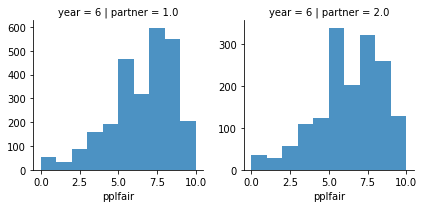

In [21]:
g = sns.FacetGrid(data_2012, row='year', col='partner', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'pplfair', alpha=0.8)

# Run the Shapiro Test for Normality

print('Lives with Partner (1.0):', shapiro(data_2012[data_2012.partner == 1].pplfair.dropna()))
print('Lives Alone (2.0):', shapiro(data_2012[data_2012.partner == 2].pplfair.dropna()))

In [33]:
data_2012['partner'].dropna().value_counts()

1.0    2674
2.0    1616
Name: partner, dtype: int64

In [34]:
data_2012[data_2012.partner == 2].pplfair.dropna().count()

1608

In [32]:
# Printing Wilcoxon Test for fairness across living with and without partners.  
# Using only first 1608 entries of living with partners to even counts.
print('Wilcoxon Test:', wilcoxon(data_2012[data_2012.partner == 1].pplfair.dropna()[:1608], 
                                 y=data_2012[data_2012.partner == 2].pplfair.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)


The results of the Wilcoxon test state that there is a significant difference between partnered people and people living alone.

In [36]:
print('Median Fairness for People living with Partners:', data_2012[data_2012.partner == 1].pplfair.median())
print('Median Fairness for People living Alone:', data_2012[data_2012['partner'] == 2].pplfair.median())

Median Fairness for People living with Partners: 7.0
Median Fairness for People living Alone: 6.0


**Answer:** People who live with partners were more likely to believe people were fair in 2012.

# 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [41]:
# Looking at Spain, Norway, Sweden, and the Czech Republic - ES, SE, CZ, NO

data_2014 = data[data['year'] == 7]

country_subset = data_2014[data_2014['cntry'].isin(['ES', 'SE', 'CZ', 'NO'])]

In [42]:
country_subset.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
2204,CZ,1001.0,7,5.0,3.0,3.0,2.0,7.0,4.0,4.0,2.0,71.0,2.0
2205,CZ,1002.0,7,5.0,5.0,7.0,3.0,5.0,5.0,1.0,2.0,52.0,1.0
2206,CZ,1003.0,7,7.0,5.0,4.0,3.0,6.0,4.0,3.0,1.0,55.0,2.0
2207,CZ,1004.0,7,7.0,5.0,5.0,3.0,7.0,4.0,3.0,1.0,64.0,1.0
2208,CZ,1005.0,7,3.0,4.0,5.0,5.0,6.0,5.0,3.0,1.0,59.0,1.0


					Distribution of Social Meetings


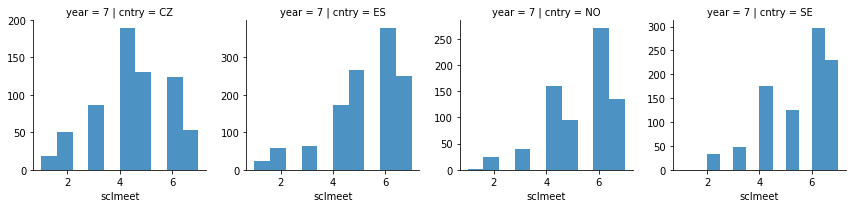

Shapiro Tests for Normality
CZ 7 (0.9448645710945129, 3.1643033327052525e-14)

ES 7 (0.9136462211608887, 6.898763644671094e-25)

NO 7 (0.8795287609100342, 4.6808705797415216e-23)

SE 7 (0.912103533744812, 5.600742285549146e-22)



In [45]:
# Plotting histograms of trust for each country for each year
g = sns.FacetGrid(country_subset, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclmeet', alpha=0.8)
print('\t\t\t\t\tDistribution of Social Meetings')
plt.show()

# Testing each country and each year to determine if trust is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(country_subset.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = country_subset[country_subset.cntry ==cnt].dropna()
    print(cnt, year, shapiro(data_temp[data_temp.year ==year].happy))
    print()

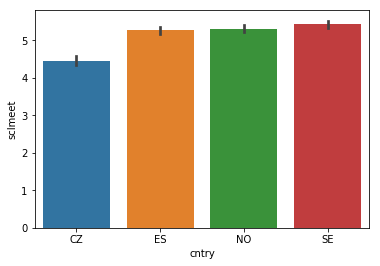

In [51]:
sns.barplot(x='cntry', y='sclmeet', data=country_subset)

In [58]:
es_soc = country_subset[country_subset['cntry'] == 'ES'].sclmeet.dropna()
cz_soc = country_subset[country_subset['cntry'] == 'CZ'].sclmeet.dropna()
no_soc = country_subset[country_subset['cntry'] == 'NO'].sclmeet.dropna()
se_soc = country_subset[country_subset['cntry'] == 'SE'].sclmeet.dropna()

In [59]:
# Printing Kruskal test statistic
print(kruskal(es_soc,
             cz_soc,
             no_soc,
             se_soc))

KruskalResult(statistic=199.91509305978323, pvalue=4.400563536291911e-43)


Reading the Kruskal test, we can see that the distributions of social meetings are different from one another. We need to run t-tests for all distributions against each other to determine which ones are the different.

In [66]:
print('Social T-test for Spain vs Czech Republic, Norway, and Sweden:')
print(stats.ttest_ind(es_soc, cz_soc))
print(stats.ttest_ind(es_soc, no_soc))
print(stats.ttest_ind(es_soc, se_soc))
print('\n')

print('Social T-test for Czech Republic vs Norway and Sweden:')
print(stats.ttest_ind(cz_soc, no_soc))
print(stats.ttest_ind(cz_soc, se_soc))
print('\n')

print('Social T-test for Norway vs Sweden:')
print(stats.ttest_ind(no_soc, se_soc))


Social T-test for Spain vs Czech Republic, Norway, and Sweden:
Ttest_indResult(statistic=11.400026538179093, pvalue=3.7676844407353374e-29)
Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
Ttest_indResult(statistic=-2.649547268580078, pvalue=0.00811992279651295)


Social T-test for Czech Republic vs Norway and Sweden:
Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
Ttest_indResult(statistic=-13.471687937687198, pvalue=3.252593934148172e-39)


Social T-test for Norway vs Sweden:
Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.06734412432597783)


**Answer:** From the data we can conclude the following:

* **Spain** is significantly different from the Czech Republic and Sweden, but not significantly different from Norway.
* **The Czech Republic** is significantly different from all three other countries (Spain, Norway, and Sweden)  
* **Norway** is slightly different from Sweden, but not enough that it cannot be clearly stated that there is a statistically significant difference. 

# 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [70]:
country_subset['agea'].describe()

count    3419.000000
mean       47.646680
std        18.553587
min        15.000000
25%        33.000000
50%        47.000000
75%        62.000000
max       114.000000
Name: agea, dtype: float64

In [71]:
country_subset['agea'].min()

15.0

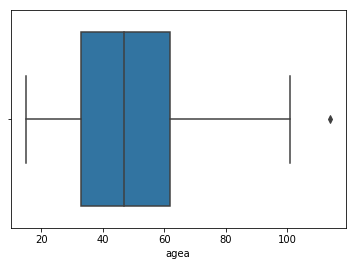

In [72]:
sns.boxplot(country_subset['agea'])

In [76]:
country_subset[country_subset['agea'] > ]

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
4353,ES,662.0,7,3.0,4.0,6.0,2.0,7.0,7.0,3.0,1.0,93.0,1.0
4747,ES,1546.0,7,3.0,7.0,7.0,6.0,7.0,6.0,3.0,2.0,101.0,2.0
6100,NO,7356.0,7,7.0,2.0,8.0,7.0,3.0,6.0,1.0,2.0,91.0,2.0
6433,NO,14784.0,7,0.0,8.0,8.0,8.0,8.0,6.0,3.0,1.0,93.0,1.0
6538,NO,17328.0,7,7.0,5.0,8.0,5.0,6.0,6.0,3.0,2.0,94.0,2.0
6564,NO,17886.0,7,6.0,5.0,8.0,10.0,8.0,4.0,3.0,1.0,92.0,1.0
7686,SE,7.0,7,3.0,0.0,5.0,7.0,9.0,4.0,4.0,2.0,95.0,2.0
7687,SE,13.0,7,2.0,6.0,NaN,8.0,6.0,7.0,4.0,2.0,94.0,2.0
7688,SE,22.0,7,5.0,5.0,5.0,8.0,5.0,7.0,2.0,1.0,93.0,2.0
7689,SE,30.0,7,7.0,7.0,7.0,8.0,10.0,7.0,3.0,1.0,91.0,1.0


In [91]:
age_bins= [15,34,53,71,89,(country_subset['agea'].max()+1)]


age_labels = ['15-33', '34-52', '53-70', '71-89', '89+']
country_subset['age_groups'] = pd.cut(country_subset['agea'], bins=age_bins, labels=age_labels, right=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [86]:
country_subset.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,age_groups
2204,CZ,1001.0,7,5.0,3.0,3.0,2.0,7.0,4.0,4.0,2.0,71.0,2.0,4
2205,CZ,1002.0,7,5.0,5.0,7.0,3.0,5.0,5.0,1.0,2.0,52.0,1.0,2
2206,CZ,1003.0,7,7.0,5.0,4.0,3.0,6.0,4.0,3.0,1.0,55.0,2.0,3
2207,CZ,1004.0,7,7.0,5.0,5.0,3.0,7.0,4.0,3.0,1.0,64.0,1.0,3
2208,CZ,1005.0,7,3.0,4.0,5.0,5.0,6.0,5.0,3.0,1.0,59.0,1.0,3


		Distribution of Social Activities from 2014 for Four European Countries


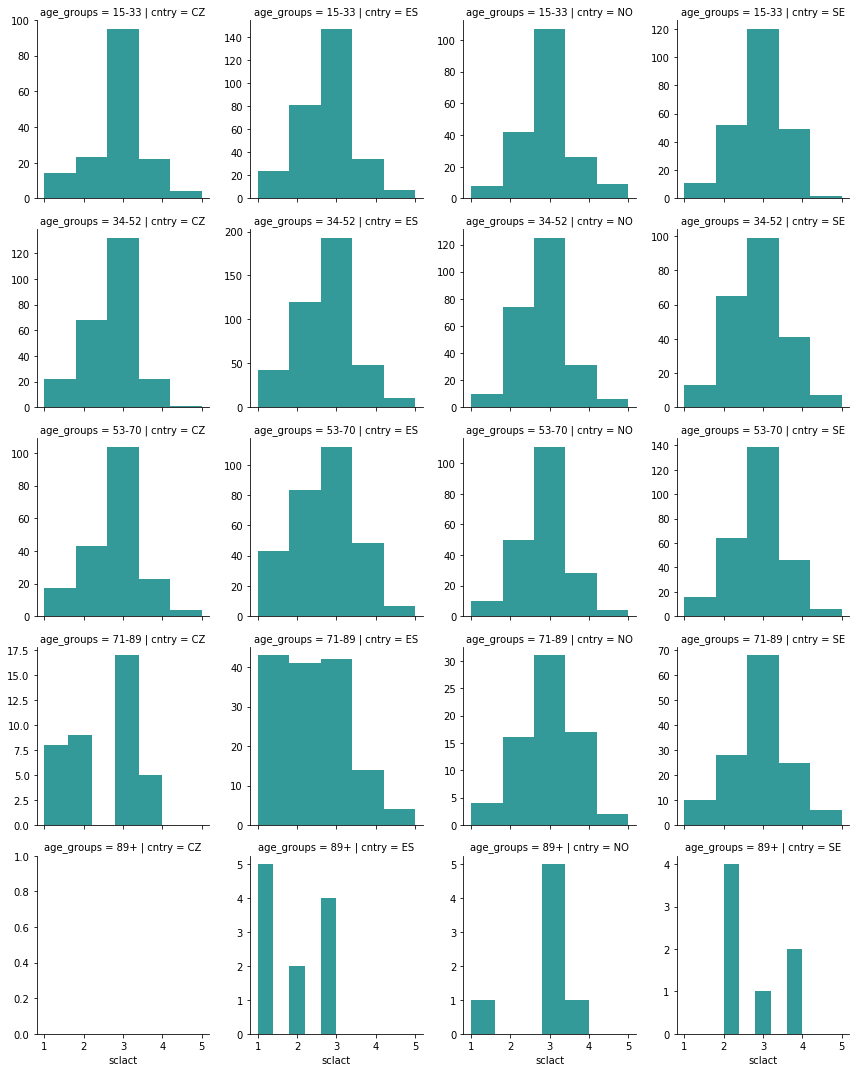

Shapiro Tests for Normality
CZ 15-33 (0.9187135696411133, 1.1932961285765487e-07)

CZ 34-52 (0.9446314573287964, 1.0235982728090676e-07)

CZ 53-70 (0.9303797483444214, 9.513244236813989e-08)

CZ 71-89 (0.9335976243019104, 0.039858125150203705)


ES 15-33 (0.9100622534751892, 4.950634520384245e-12)

ES 34-52 (0.9020270109176636, 1.3782746475967788e-15)

ES 53-70 (0.9339866638183594, 4.0932721101505365e-10)

ES 71-89 (0.9064923524856567, 1.0254284887878384e-07)

ES 89+ (0.9348940253257751, 0.46245166659355164)

NO 15-33 (0.9132307171821594, 3.3540568100676182e-09)

NO 34-52 (0.8571600317955017, 3.3573282500441726e-14)

NO 53-70 (0.8649387359619141, 1.8937251940187583e-12)

NO 71-89 (0.9101658463478088, 0.00010008494427893311)

NO 89+ (0.9417939186096191, 0.6786479353904724)

SE 15-33 (0.9161946177482605, 3.735189102460623e-10)

SE 34-52 (0.9147279262542725, 4.550108345657833e-10)

SE 53-70 (0.9056249856948853, 5.569349668943513e-12)

SE 71-89 (0.9019975662231445, 6.897100490732555e-08)



In [92]:
g = sns.FacetGrid(country_subset, row='age_groups', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclact', alpha=0.8, color='teal', bins=5)
print('\t\tDistribution of Social Activities from 2014 for Four European Countries')
plt.show()

# Testing each country and each year to determine if social activity is normally distributed through Shapiro test
# Creating lists of countries and years

cntrys = list(country_subset.cntry.unique())
years = ['15-33', '34-52', '53-70', '71-89', '89+']
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = country_subset[country_subset.cntry ==cnt].dropna()
    for year in years:
        try:
        # Printing Shapiro test results
            print(cnt, year, shapiro(data_temp[data_temp.age_groups ==year].happy))
        except ValueError:
            None
        print()


#cntrys = list(country_subset.cntry.unique())
#years = [1,2,3,4,5]
#print('Shapiro Tests for Normality')
#for cnt in cntrys:
    # Printing Shapiro test results
#    print(cnt, shapiro(country_subset[country_subset.cntry ==cnt].sclact.dropna()))
#    print()

The Shapiro Test for normality shows that we reject the null hypothesis that the data is normally distributed. We will examine age groups between all the countries using T-tests to see where there are differences.

In [107]:
# Kruskal-Wallis, a non-parametric version of ANOVA test.

# Printing Kruskal test statistic

bin_one = country_subset[country_subset['age_groups'] == '15-33']
bin_two = country_subset[country_subset['age_groups'] == '34-52']
bin_three = country_subset[country_subset['age_groups'] == '53-70']
bin_four = country_subset[country_subset['age_groups'] == '71-89']
bin_five = country_subset[country_subset['age_groups'] == '89+']

bin_list = [bin_one, bin_two, bin_three, bin_four, bin_five]

for item in bin_list:
    print(kruskal(item[item.cntry == 'CZ'].sclact.dropna(),
             item[item.cntry == 'ES'].sclact.dropna(),
             item[item.cntry == 'NO'].sclact.dropna(),
             item[item.cntry == 'SE'].sclact.dropna()))

KruskalResult(statistic=10.308387482374066, pvalue=0.01611867529795601)
KruskalResult(statistic=7.034631001375862, pvalue=0.07080211784683954)
KruskalResult(statistic=9.693566432423426, pvalue=0.02135884557590941)
KruskalResult(statistic=36.492800428902534, pvalue=5.890863713055285e-08)
KruskalResult(statistic=nan, pvalue=nan)


So we find from the Kruskal result that the differences are meaningful for the first, third, and fourth age group (ages 15-33, 53-70, and 71-89). So now we run T-tests to determine the differences between those countries? 

In [108]:
bin_one = country_subset[country_subset['age_groups'] == '15-33']
bin_two = country_subset[country_subset['age_groups'] == '34-52']
bin_three = country_subset[country_subset['age_groups'] == '53-70']
bin_four = country_subset[country_subset['age_groups'] == '71-89']
bin_five = country_subset[country_subset['age_groups'] == '89+']

print("Age Group 15-33:")
print('CZ vs ES:', ttest_ind(bin_one[bin_one.cntry == 'CZ'].sclact.dropna(),
                             bin_one[bin_one.cntry=='ES'].sclact.dropna()))
print('CZ vs NO:', ttest_ind(bin_one[bin_one.cntry == 'CZ'].sclact.dropna(),
                             bin_one[bin_one.cntry=='NO'].sclact.dropna()))
print('CZ vs SE:', ttest_ind(bin_one[bin_one.cntry == 'CZ'].sclact.dropna(),
                             bin_one[bin_one.cntry=='SE'].sclact.dropna()))
print('\n')
print('ES vs NO:', ttest_ind(bin_one[bin_one.cntry == 'ES'].sclact.dropna(),
                             bin_one[bin_one.cntry=='NO'].sclact.dropna()))
print('ES vs SE:', ttest_ind(bin_one[bin_one.cntry == 'ES'].sclact.dropna(),
                             bin_one[bin_one.cntry=='SE'].sclact.dropna()))
print('\n')
print('NO vs SE:', ttest_ind(bin_one[bin_one.cntry == 'NO'].sclact.dropna(),
                             bin_one[bin_one.cntry=='SE'].sclact.dropna()))
print('\n\n')
print('Age Group 53-70:')
print('CZ vs ES:', ttest_ind(bin_three[bin_three.cntry == 'CZ'].sclact.dropna(),
                             bin_three[bin_three.cntry=='ES'].sclact.dropna()))
print('CZ vs NO:', ttest_ind(bin_three[bin_three.cntry == 'CZ'].sclact.dropna(),
                             bin_three[bin_three.cntry=='NO'].sclact.dropna()))
print('CZ vs SE:', ttest_ind(bin_three[bin_three.cntry == 'CZ'].sclact.dropna(),
                             bin_three[bin_three.cntry=='SE'].sclact.dropna()))
print('\n')
print('ES vs NO:', ttest_ind(bin_three[bin_three.cntry == 'ES'].sclact.dropna(),
                             bin_three[bin_three.cntry=='NO'].sclact.dropna()))
print('ES vs SE:', ttest_ind(bin_three[bin_three.cntry == 'ES'].sclact.dropna(),
                             bin_three[bin_three.cntry=='SE'].sclact.dropna()))
print('\n')
print('NO vs SE:', ttest_ind(bin_three[bin_three.cntry == 'NO'].sclact.dropna(),
                             bin_three[bin_three.cntry=='SE'].sclact.dropna()))
print('\n\n')
print('Age Group 71-89:')
print('CZ vs ES:', ttest_ind(bin_four[bin_four.cntry == 'CZ'].sclact.dropna(),
                             bin_four[bin_four.cntry=='ES'].sclact.dropna()))
print('CZ vs NO:', ttest_ind(bin_four[bin_four.cntry == 'CZ'].sclact.dropna(),
                             bin_four[bin_four.cntry=='NO'].sclact.dropna()))
print('CZ vs SE:', ttest_ind(bin_four[bin_four.cntry == 'CZ'].sclact.dropna(),
                             bin_four[bin_four.cntry=='SE'].sclact.dropna()))
print('\n')
print('ES vs NO:', ttest_ind(bin_four[bin_four.cntry == 'ES'].sclact.dropna(),
                             bin_four[bin_four.cntry=='NO'].sclact.dropna()))
print('ES vs SE:', ttest_ind(bin_four[bin_four.cntry == 'ES'].sclact.dropna(),
                             bin_four[bin_four.cntry=='SE'].sclact.dropna()))
print('\n')
print('NO vs SE:', ttest_ind(bin_four[bin_four.cntry == 'NO'].sclact.dropna(),
                             bin_four[bin_four.cntry=='SE'].sclact.dropna()))
print('\n\n')

Age Group 15-33:
CZ vs ES: Ttest_indResult(statistic=1.69423650750673, pvalue=0.09091380259507321)
CZ vs NO: Ttest_indResult(statistic=-0.6600612596136837, pvalue=0.5096511435108756)
CZ vs SE: Ttest_indResult(statistic=-0.508273205808115, pvalue=0.6115491264793835)


ES vs NO: Ttest_indResult(statistic=-2.5692570360414804, pvalue=0.010490746766031888)
ES vs SE: Ttest_indResult(statistic=-2.544580347072959, pvalue=0.011226121881636223)


NO vs SE: Ttest_indResult(statistic=0.21037134705982596, pvalue=0.8334789107026495)



Age Group 53-70:
CZ vs ES: Ttest_indResult(statistic=1.414281812729049, pvalue=0.1579247826940866)
CZ vs NO: Ttest_indResult(statistic=-0.8812918171921037, pvalue=0.3786999223160201)
CZ vs SE: Ttest_indResult(statistic=-1.254367702045251, pvalue=0.21034538798504948)


ES vs NO: Ttest_indResult(statistic=-2.347294053529447, pvalue=0.019304144492609775)
ES vs SE: Ttest_indResult(statistic=-2.874580076719594, pvalue=0.004198826921310374)


NO vs SE: Ttest_indResult(stati

**Answer** By age group, here are the results of the test:

* Between the ages of 15-33 we are unable to reject the null hypothesis except between **Spain and Norway** and **Spain and Sweden**.

* Between the ages of 53-70, there is significant difference only between **Spain and Norway** and **Spain and Sweden**

* In the age group 71-89, there is significant statistical difference between the **Czech Republic and Norway** as well as the **Czech Republic and Sweden**. 

#### Below is an attempt to optimize the T-test permutations and is a work in progress. Disregard

In [ ]:
# Trying to make a function to optimize the t-tests above (to be worked on)

fist list.pop(czech republic) and appending the second list until you get down to spain and then go backwards

        
        

print("Age Group 15-33:")
print('CZ vs ES:', ttest_ind(bin_one[bin_one.cntry == 'CZ'].sclact.dropna(),
                             bin_one[bin_one.cntry=='ES'].sclact.dropna()))
print('CZ vs NO:', ttest_ind(bin_one[bin_one.cntry == 'CZ'].sclact.dropna(),
                             bin_one[bin_one.cntry=='NO'].sclact.dropna()))
print('CZ vs SE:', ttest_ind(bin_one[bin_one.cntry == 'CZ'].sclact.dropna(),
                             bin_one[bin_one.cntry=='SE'].sclact.dropna()))
print('\n')
print('ES vs NO:', ttest_ind(bin_one[bin_one.cntry == 'ES'].sclact.dropna(),
                             bin_one[bin_one.cntry=='NO'].sclact.dropna()))
print('ES vs SE:', ttest_ind(bin_one[bin_one.cntry == 'ES'].sclact.dropna(),
                             bin_one[bin_one.cntry=='SE'].sclact.dropna()))
print('\n')
print('NO vs SE:', ttest_ind(bin_one[bin_one.cntry == 'NO'].sclact.dropna(),
                             bin_one[bin_one.cntry=='SE'].sclact.dropna()))
print('\n\n')

In [102]:
ages = ['15-33', '34-52', '53-70', '71-89']

for age in ages:
    print("Age Group " + age)
    countries = ['CZ','ES','NO','SE']
    while len(countries)>1:
        age_bin = country_subset[country_subset['age_groups'] == age]
        for cntry in countries:
            for i in range (0, len(countries)):
                print("{} vs {}:".format(countries[i],countries[cntry]), ttest_indbin_one[bin_one.cntry == countries[i]].sclact.dropna(),
                             bin_one[bin_one.cntry == countries[i+1]].sclact.dropna())
        countries.pop(countries[0])
        
        
        

Age Group 15-33


TypeError: list indices must be integers or slices, not str

In [104]:
from itertools import combinations

In [105]:
ages = ['15-33', '34-52', '53-70', '71-89']

for age in ages:
    combinations(countries,2)
    